In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)
# to draw pictures in jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = np.loadtxt(open("./data.txt","r"))
x = data[:,0].reshape(-1, 1)
y = data[:,1].reshape(-1, 1)

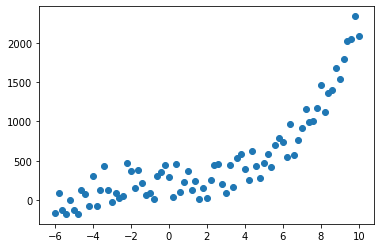

In [3]:
plt.scatter(x, y)
plt.show()

### 1. Partition all data randomly into 10 folds and produce 10 different training-validation set pairs

In [69]:
kf = KFold(n_splits=10, shuffle=True, )
for k,(train_index, test_index) in enumerate(kf.split(x)):
    x_train, x_test = x[train_index], x[test_index]
    print("SET", k , "TRAIN :", x_train.T, "TEST :", x_test.T, "\n")

SET 0 TRAIN : [[-6.  -5.8 -5.6 -5.4 -5.2 -5.  -4.8 -4.6 -4.4 -4.2 -4.  -3.8 -3.6 -3.4
  -3.  -2.8 -2.6 -2.4 -2.2 -2.  -1.6 -1.4 -1.2 -1.  -0.6 -0.4 -0.2  0.
   0.2  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.8  3.   3.2
   3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4  5.6  5.8  6.
   6.2  6.4  6.6  7.4  7.6  7.8  8.   8.2  8.4  8.6  8.8  9.   9.2  9.6
   9.8 10. ]] TEST : [[-3.2 -1.8 -0.8  0.4  2.6  6.8  7.   7.2  9.4]] 

72
SET 1 TRAIN : [[-6.  -5.8 -5.6 -5.4 -5.2 -5.  -4.8 -4.6 -4.4 -4.  -3.8 -3.6 -3.4 -3.2
  -3.  -2.8 -2.6 -2.2 -2.  -1.8 -1.4 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2
   0.4  0.6  0.8  1.   1.2  1.4  1.6  2.   2.2  2.4  2.6  2.8  3.2  3.4
   3.6  3.8  4.   4.4  4.6  4.8  5.   5.2  5.4  5.6  5.8  6.   6.2  6.4
   6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2  8.4  8.6  8.8  9.   9.2
   9.4  9.6  9.8]] TEST : [[-4.2 -2.4 -1.6 -1.2  1.8  3.   4.2 10. ]] 

73
SET 2 TRAIN : [[-6.  -5.8 -5.6 -5.4 -5.2 -5.  -4.8 -4.6 -4.4 -4.2 -4.  -3.6 -3.4 -3.2
  -3.  -2.8 -2.6 -

### 2. Normalize your training inputs and outputs by using training sample mean and std deviation

In [5]:
for k,(train_index, test_index) in enumerate(kf.split(x,y)):
    x_train, x_test = x[train_index], x[test_index]
    std_scale = preprocessing.StandardScaler().fit(x_train)
    x_train_std, x_test_std = std_scale.transform(x_train), std_scale.transform(x_test)
    print("SET", k , "TRAIN :", x_train_std.T, "TEST :", x_test_std.T, "\n")

SET 0 TRAIN : [[-1.6788958  -1.6354136  -1.59193141 -1.54844922 -1.50496702 -1.46148483
  -1.41800264 -1.37452044 -1.33103825 -1.28755606 -1.24407386 -1.20059167
  -1.15710948 -1.07014509 -1.0266629  -0.93969851 -0.89621632 -0.85273412
  -0.80925193 -0.76576974 -0.72228754 -0.67880535 -0.63532316 -0.59184096
  -0.54835877 -0.50487658 -0.46139438 -0.37443    -0.3309478  -0.28746561
  -0.24398342 -0.20050122 -0.15701903 -0.11353684 -0.07005464 -0.02657245
   0.01690974  0.06039194  0.10387413  0.14735632  0.19083852  0.23432071
   0.2778029   0.3212851   0.36476729  0.40824948  0.45173167  0.49521387
   0.53869606  0.58217825  0.62566045  0.66914264  0.71262483  0.75610703
   0.79958922  0.84307141  0.88655361  0.97351799  1.10396457  1.14744677
   1.23441115  1.27789335  1.32137554  1.36485773  1.40833993  1.49530431
   1.53878651  1.5822687   1.62575089  1.66923309  1.71271528  1.79967967]] TEST : [[-1.11362728 -0.9831807  -0.41791219  0.9300358   1.01700019  1.06048238
   1.19092896  

### 3. For each of the 10 training sets, compute the weights that minimizes the training error for each hypothesis
(a) g(x;w) = w0 + xw1

(b) g(x;w) = w0 + xw1 + x2w2 + x3w3

(c) g(x;w) = w0 + x1w1 + x2w2 + x3w3 + x4w4 + x5w5

(d) g(x;w) = w0 + x1w1 + x2w2 + x3w3 + x4w4 + x5w5 + ... + x50w50

In [36]:
def gradient_descent(X, y, w, learning_rate, iterations):
    error_history = np.zeros(iterations)
    w_history = np.zeros((iterations,len(w)))
    n = len(y)
    for it in range(iterations):        
        prediction = np.dot(X,w)
        w = w -  learning_rate * (2/n) * np.dot(X.T,(prediction - y))
        w_history[it,:] =w.T
        error_history[it]  = error(w,X,y)
    return w, w_history, error_history

In [34]:
def error(w,X,y):  
    n = len(y)
    predictions = np.dot(X,w)
    error = (1/n) * np.sum(np.square(predictions-y))
    return error

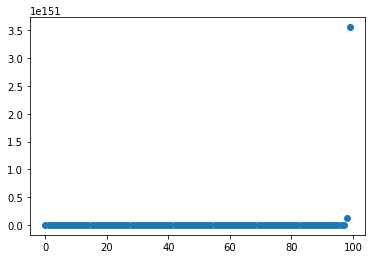

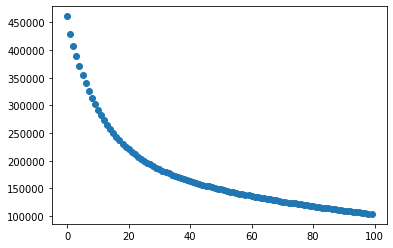

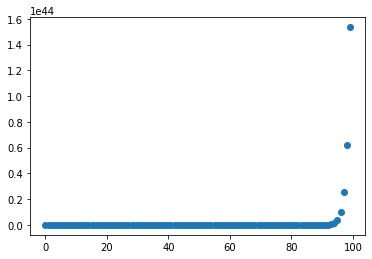

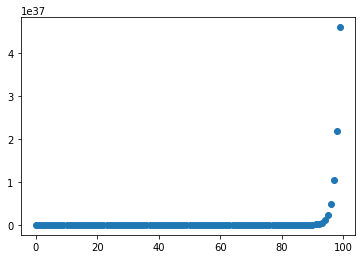

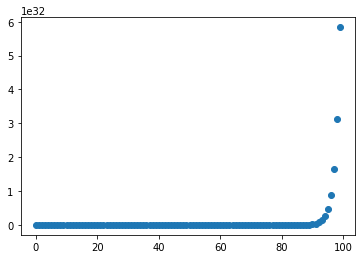

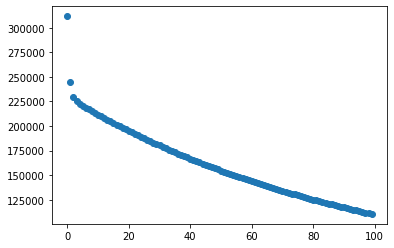

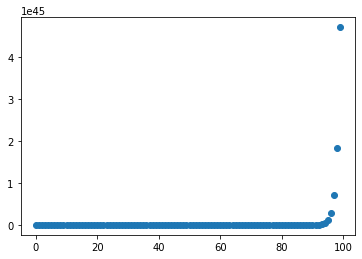

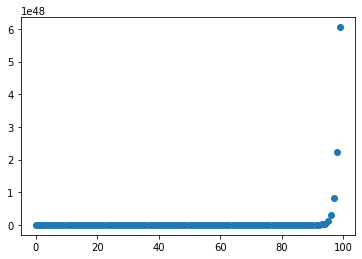

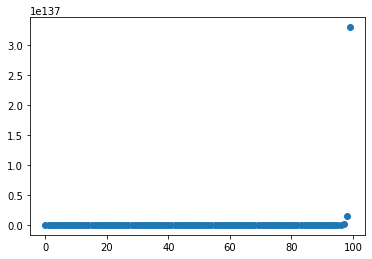

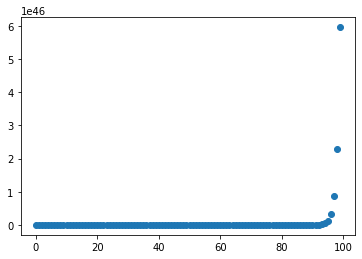

In [67]:
W_a = np.zeros((kf.get_n_splits(),2,1))
W_b = np.zeros((kf.get_n_splits(),4,1))
W_c = np.zeros((kf.get_n_splits(),6,1))
W_d = np.zeros((kf.get_n_splits(),10,1))

training_error_a = np.zeros(kf.get_n_splits())
training_error_b = np.zeros(kf.get_n_splits())
training_error_c = np.zeros(kf.get_n_splits())
training_error_d = np.zeros(kf.get_n_splits())

test_error_a = np.zeros(kf.get_n_splits())
test_error_b = np.zeros(kf.get_n_splits())
test_error_c = np.zeros(kf.get_n_splits())
test_error_d = np.zeros(kf.get_n_splits())

for k, (train_index, test_index) in enumerate(kf.split(x,y)):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    #Standarization
    std_scale = preprocessing.StandardScaler().fit(x_train)
    x_train, x_test = std_scale.transform(x_train), std_scale.transform(x_test)
    
    #Convert x_train, x_test to matrix form for each hypothesis
    X_train_a = np.c_[np.ones((len(x_train),1)),x_train]
    X_test_a = np.c_[np.ones((len(x_test),1)),x_test]
    
    ft_poly3=PolynomialFeatures(degree=3)
    X_train_b=ft_poly3.fit_transform(x_train)
    X_test_b=ft_poly3.fit_transform(x_test)
        
    ft_poly5=PolynomialFeatures(degree=5)
    X_train_c=ft_poly5.fit_transform(x_train)
    X_test_c=ft_poly5.fit_transform(x_test)
        
    ft_poly50=PolynomialFeatures(degree=9)
    X_train_d=ft_poly50.fit_transform(x_train)
    X_test_d=ft_poly50.fit_transform(x_test)
    
    #Initialize w for each hypothesis
    
    W_a[k] = np.random.randn(2,1)
    W_b[k] = np.random.randn(4,1)
    W_c[k] = np.random.randn(6,1)
    W_d[k] = np.random.randn(10,1)
    
    #Define constants for GD function
    lr =0.01
    n_iter = 100
        
    #Run GD function for each hypothesis
    W_a[k], w_hist_a, error_a = gradient_descent(X_train_a,y_train,W_a[k],lr,n_iter)
    W_b[k], w_hist_b, error_b = gradient_descent(X_train_b,y_train,W_b[k],lr,n_iter)
    W_c[k], w_hist_c, error_c = gradient_descent(X_train_c,y_train,W_c[k],lr,n_iter)
    W_d[k], w_hist_d, error_d = gradient_descent(X_train_d,y_train,W_d[k],0.001,n_iter)         
    
    ##reg = LinearRegression().fit(x_train, y_train)
    
    ##Get training and testing error for each hypothesis    
    ##training_error_a[k] = error(W_a[k], X_train_a, y_train)
    ##training_error_b[k] = error(W_b[k], X_train_b, y_train)
    training_error_c[k] = error(W_c[k], X_train_c, y_train)
    ##training_error_d[k] = error(W_d[k], X_train_d, y_train)
    
    ##test_error_a[k] = error(W_a[k], X_test_a, y_test)
    ##test_error_b[k] = error(W_b[k], X_test_b, y_test)
    test_error_c[k] = error(W_c[k], X_test_c, y_test)
    ##test_error_d[k] = error(W_d[k], X_test_d, y_test)

    plt.scatter(range(n_iter),error_d)
    plt.show()
    

    

In [ ]:
"""
    predictionsA = np.dot(X_train_a,W_a[k])
    predictionsB = np.dot(X_train_b,W_b[k])
    predictionsC = np.dot(X_train_c,W_c[k])
    predictionsD = np.dot(X_train_d,W_d[k])
    plt.scatter(x_train, y_train)
    plt.scatter(x_train, predictionsA)
    plt.scatter(x_train, predictionsB)
    plt.scatter(x_train, predictionsC)
    plt.scatter(x_train, predictionsD)
    plt.show()
    """         
print ("A - Weights : ", W_a)
print ("B - Weights : ", W_b)
print ("C - Weights : ", W_c)
print ("D - Weights : ", W_d)

In [ ]:
hypothesis = ['A', 'B', 'C', 'D']
error_mean_trainning = [training_error_a.mean(), training_error_b.mean(), training_error_c.mean(), training_error_d.mean()]
error_std_trainning = [training_error_a.std(), training_error_b.std(), training_error_c.std(),training_error_d.std()]

print (error_mean_trainning)
print (error_std_trainning)

plt.figure()
plt.bar(hypothesis, error_mean_trainning, yerr= error_std_trainning,align='center')
plt.show()